In [1]:
from data.load import load_data

data = load_data()

In [ ]:
X = data.drop(columns=["cs_home_price_growth"])
y = data["cs_home_price_growth"]

In [4]:
from statsmodels.regression.linear_model import OLS
from statsmodels.api import add_constant

X_with_const = add_constant(X)
model = OLS(
    endog=y,
    exog=X_with_const
)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     cs_home_price_growth   R-squared:                       0.645
Model:                              OLS   Adj. R-squared:                  0.638
Method:                   Least Squares   F-statistic:                     87.85
Date:                  Mon, 21 Jul 2025   Prob (F-statistic):           4.17e-92
Time:                          11:52:12   Log-Likelihood:                -1189.2
No. Observations:                   445   AIC:                             2398.
Df Residuals:                       435   BIC:                             2439.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

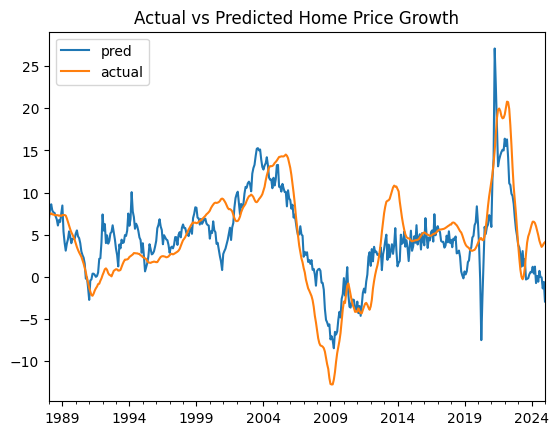

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

pred = pd.Series(results.get_prediction().predicted_mean, index=y.index)
pred.plot(label="pred")
y.plot(label="actual")
plt.legend()
plt.title("Actual vs Predicted Home Price Growth")
plt.show()

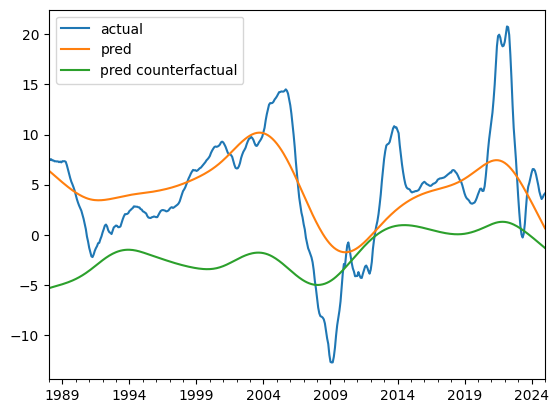

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter

X_no_credit_exuberance = X.copy()
X_no_credit_exuberance[["household_debt_growth", "real_estate_loans_growth", "real_m2_growth"]] = 0
X_no_credit_exuberance_with_const = add_constant(X_no_credit_exuberance)

pred_no_credit_exuberance = pd.Series(results.get_prediction(exog=X_no_credit_exuberance_with_const).predicted_mean, index=y.index)

y.plot(label="actual")

_, pred_trend = hpfilter(pred, lamb=129600)
_, pred_no_credit_exuberance_trend = hpfilter(pred_no_credit_exuberance, lamb=129600)

pred_trend.plot(label="pred")
pred_no_credit_exuberance_trend.plot(label="pred counterfactual")
plt.legend()

<Axes: >

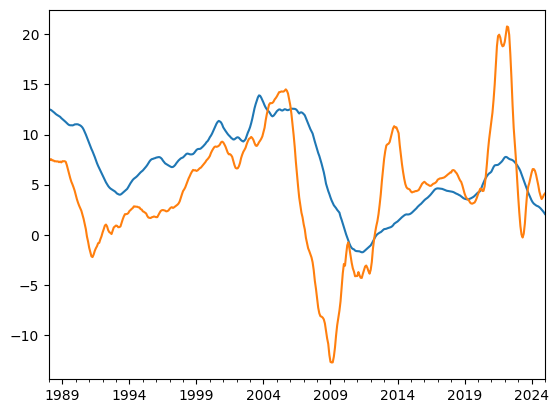

In [14]:
pd.Series((pred - pred_no_credit_exuberance).ewm(span=12, adjust=False).mean()).plot()
y.plot()